# Introducció a la pràctica 2



# Apartat (A): Comparativa de models (4pts)


In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')
    
# import some data to play with
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

dataset = load_dataset('data/train.csv')

# Take the first two features. We could avoid this by using a two-dim dataset
data = dataset.values


In [182]:
X = data[:, [0, 13]]
y = data[:, 20]

X.shape

(2000, 2)

In [183]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Correct classification Logistic  0.5 % of the data:  0.815

Correct classification SVM       0.5 % of the data:  0.24
Correct classification Logistic  0.7 % of the data:  0.8566666666666667

Correct classification SVM       0.7 % of the data:  0.23
Correct classification Logistic  0.8 % of the data:  0.8

Correct classification SVM       0.8 % of the data:  0.2425


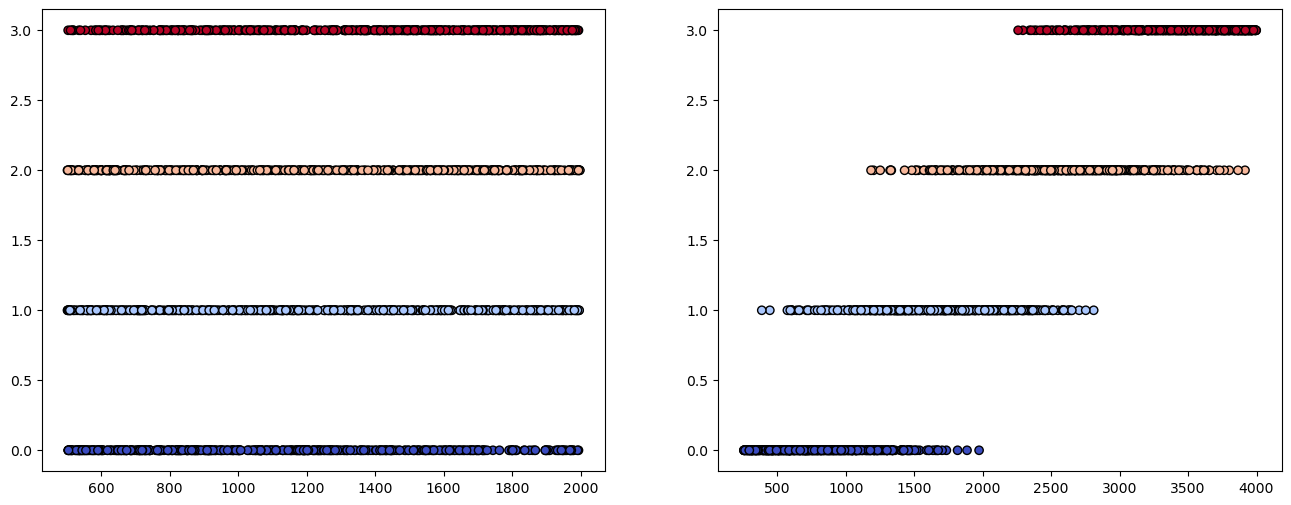

In [197]:
fig, sub = plt.subplots(1, 2, figsize=(16,6))
#Battery power
sub[0].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
#RAM
sub[1].scatter(X[:,1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')


particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)

    print ("Correct classification Logistic ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Creem el regresor logístic
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    y_pred = svc.predict(x_v)
    
    print ("\nCorrect classification SVM      ", part, "% of the data: ", svc.score(x_v, y_v))

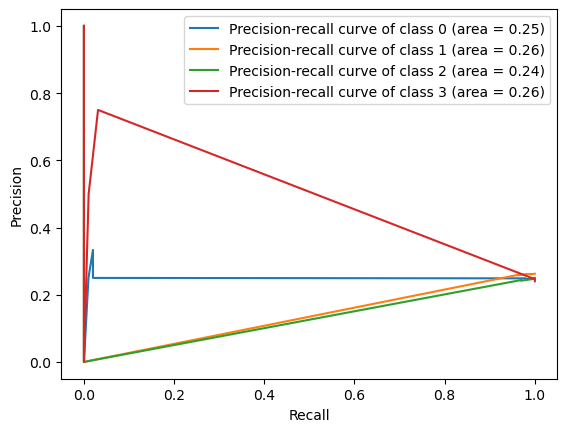

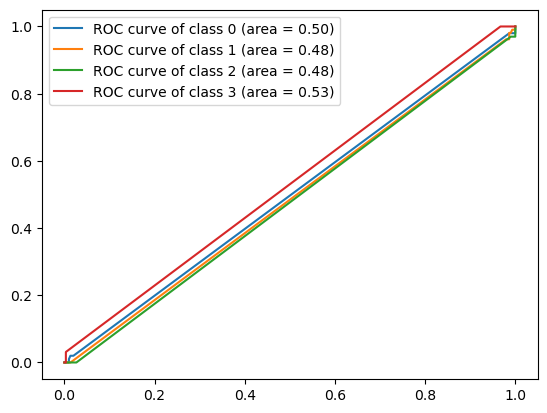

In [198]:
n_classes = 4
# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(C=1.0, gamma=0.7, degree=3):

    # import some data to play with
    dataset = load_dataset('data/train.csv')
    # Take the first two features. We could avoid this by using a two-dim dataset
    data = dataset.values

    X = data[:, [0, 13]]
    y = data[:, 20]
    X = Normalizer().fit(X).transform(X)
    
    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=1000000),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C))
    models = (clf.fit(X, y) for clf in models)
    
    plt.close('all')
    fig, sub = plt.subplots(2, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    
    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('BATERRY')
        ax.set_ylabel('RAM')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()

    


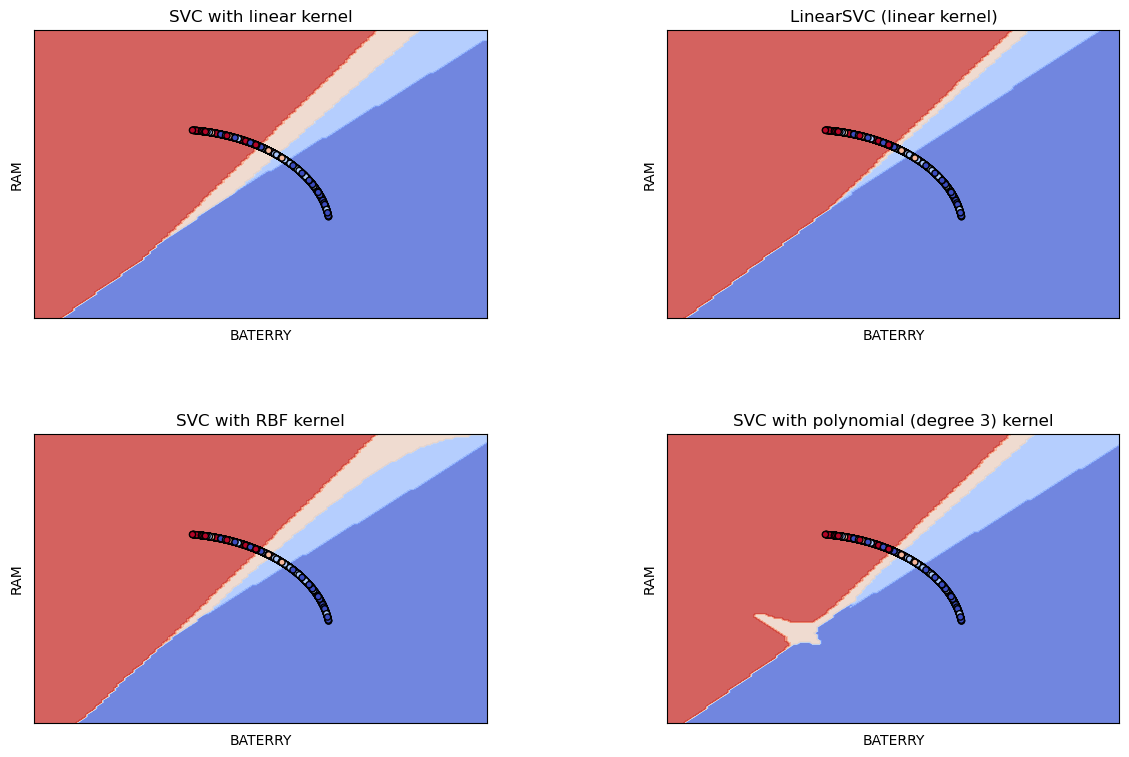

In [187]:
show_C_effect(0.0001)

# Apartat (B): Classificació Numèrica (6pts)


### 1. EDA (exploratory data analysis)

In [62]:
dataset.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [63]:
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Text(0.5, 1.0, 'Correlation')

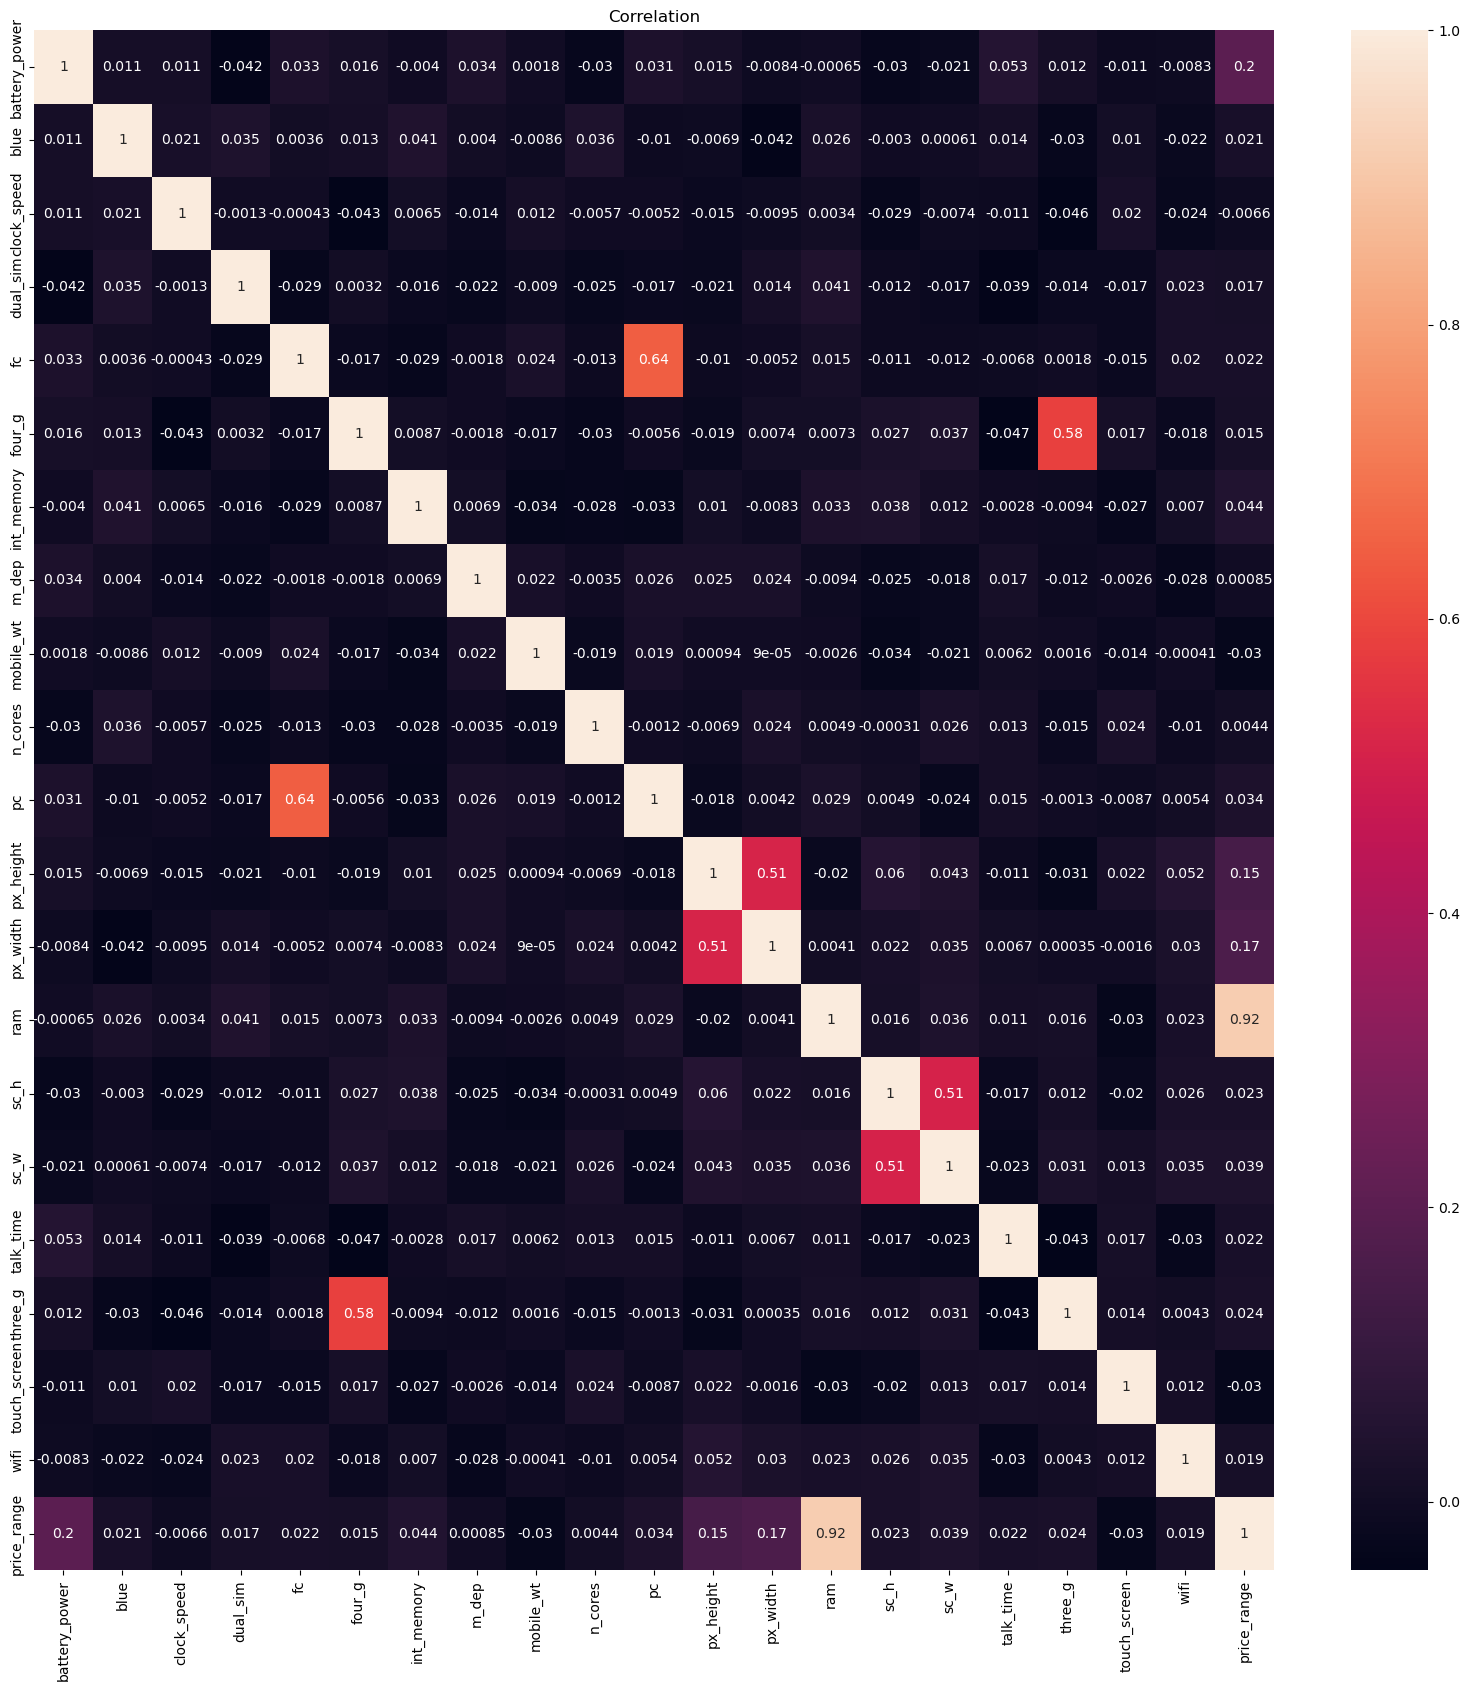

In [80]:
corr=dataset.corr()
fig = plt.figure(figsize=(20,20))
r = sns.heatmap(corr, annot=True)
r.set_title("Correlation")

In [82]:

X = data[:, [0,11,12,13]]
y = data[:, 20]

In [83]:
dataset['price_range'].unique()

array([1, 2, 3, 0])

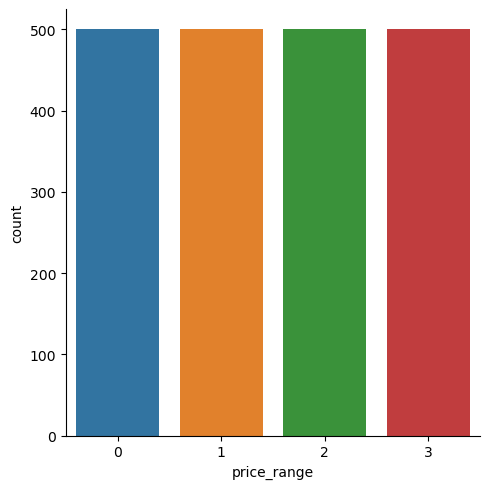

In [84]:
sns.catplot(x = 'price_range', kind = 'count', data = dataset)
plt.show()

### 2. Preprocessing (normalitzation, outlier removal, feature selection..)

In [100]:
from sklearn.preprocessing import StandardScaler

def standarize(X):
    return StandardScaler().fit(X).transform(X)

X = standarize(X)

X

array([[-0.90259726, -1.40894856, -1.14678403,  0.39170341],
       [-0.49513857,  0.58577791,  1.70446468,  0.46731702],
       [-1.5376865 ,  1.39268422,  1.07496821,  0.44149774],
       ...,
       [ 1.53077336,  0.50238257,  0.88056489,  0.86013895],
       [ 0.62252745, -0.69670724, -1.34581601, -1.15745352],
       [-1.65833069, -0.3653798 , -1.15141268,  1.65500399]])

In [101]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(X)
print(pca.score(X))

-5.52404189085671


### 3. Model Selection


In [153]:
x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=0.75, random_state=40)

In [154]:
def logisticRegression(x_t, x_v, y_t, y_v):
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001, max_iter=10000)

    # l'entrenem
    logireg.fit(x_t, y_t)
    print ("Classification Score Logistic : ", logireg.score(x_v, y_v))

def SVC(x_t, x_v, y_t, y_v, svc_kernel, itera=False):
    #Creem el regresor logístic
    if itera:
        svc = svm.SVC(C=1.0, kernel=svc_kernel, gamma=0.9, probability=True, max_iter=10000)
    else:
        svc = svm.SVC(C=1.0, kernel=svc_kernel, gamma=0.9, probability=True)
    # l'entrenem 
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    print ("Classification Score SVM " , svc_kernel , " ", svc.score(x_v, y_v))

def knn(x_t, x_v, y_t, y_v, numbers_neighbors):
    neigh = KNeighborsClassifier(n_neighbors=numbers_neighbors)
    neigh.fit(x_t, y_t)
    prob = neigh.predict(x_v)
    print ("classification Score KNN: " , numbers_neighbors, " ", neigh.score(x_v, y_v))

def perceptron(x_t, x_v, y_t, y_v):
    clf = Perceptron(penalty='l2', max_iter=10000)
    clf.fit(x_t, y_t)
    print ("classification Score Perceptron: ", clf.score(x_v, y_v))
           
def ensembleRandomForestClassifier(x_t, x_v, y_t, y_v):
    clf = RandomForestClassifier(n_estimators=10)
    clf = clf.fit(x_t, y_t)
    print ("Classification Score RandomForestClassifier: ", clf.score(x_v, y_v))


In [155]:
logisticRegression(x_t, x_v, y_t, y_v)
#‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
SVC(x_t, x_v, y_t, y_v, 'linear', True)
SVC(x_t, x_v, y_t, y_v, 'poly', True)
SVC(x_t, x_v, y_t, y_v, 'rbf')
SVC(x_t, x_v, y_t, y_v, 'sigmoid')
for k in range(1, 10):
    knn(x_t, x_v, y_t, y_v, k)

perceptron(x_t, x_v, y_t, y_v)
ensembleRandomForestClassifier(x_t, x_v, y_t, y_v)

Classification Score Logistic :  0.956
Classification Score SVM  linear   0.962
Classification Score SVM  poly   0.946
Classification Score SVM  rbf   0.926
Classification Score SVM  sigmoid   0.534
classification Score KNN:  1   0.862
classification Score KNN:  2   0.846
classification Score KNN:  3   0.9
classification Score KNN:  4   0.886
classification Score KNN:  5   0.902
classification Score KNN:  6   0.884
classification Score KNN:  7   0.902
classification Score KNN:  8   0.898
classification Score KNN:  9   0.9
classification Score Perceptron:  0.77
Classification Score RandomForestClassifier:  0.916


### 4. Crossvalidation

In [156]:
from sklearn.model_selection import KFold

def kfold(X, y):
    for i in range(2, 7):
        kf = KFold(n_splits=i)
        print("\nNumber of splits", kf.get_n_splits(X))
        for train, test in kf.split(X):
            X_train, X_test = X[train], X[test]
            y_train, y_test = y[train], y[test]
            #logisticRegression(X_test, X_train, y_test, y_train)
            #SVC(X_test, X_train, y_test, y_train, 'linear', True)
            SVC(X_test, X_train, y_test, y_train, 'poly', True) 

    
kfold(X, y)


Number of splits 2
Classification Score SVM  poly   0.952
Classification Score SVM  poly   0.954

Number of splits 3
Classification Score SVM  poly   0.940735183795949
Classification Score SVM  poly   0.9392348087021756
Classification Score SVM  poly   0.9370314842578711

Number of splits 4
Classification Score SVM  poly   0.928
Classification Score SVM  poly   0.9273333333333333
Classification Score SVM  poly   0.9386666666666666
Classification Score SVM  poly   0.9273333333333333

Number of splits 5
Classification Score SVM  poly   0.9275
Classification Score SVM  poly   0.903125
Classification Score SVM  poly   0.916875
Classification Score SVM  poly   0.91875
Classification Score SVM  poly   0.91875

Number of splits 6
Classification Score SVM  poly   0.9063625450180072
Classification Score SVM  poly   0.9003601440576231
Classification Score SVM  poly   0.904619076184763
Classification Score SVM  poly   0.9178164367126574
Classification Score SVM  poly   0.8902219556088782
Classif

### 5. Metric Analysis


In [157]:

def getPredictlogisticRegression(x_t, x_v, y_t, y_v, proba=False):
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001, max_iter=10000)
    # l'entrenem
    logireg.fit(x_t, y_t)
    if proba:
        return logireg.predict_proba(x_v)
    
    return logireg.predict(x_v)
    
def getPredictSVC(x_t, x_v, y_t, y_v, svc_kernel, proba=False):
    svc = svm.SVC(C=1.0, kernel=svc_kernel, gamma=0.9, probability=True, max_iter=10000)
    svc.fit(x_t, y_t)
    if proba:
        return svc.predict_proba(x_v)
    
    return svc.predict(x_v)
        

In [169]:
y_pred_lg = getPredictlogisticRegression(x_t, x_v, y_t, y_v)
y_pred_svc_poly = getPredictSVC(x_t, x_v, y_t, y_v, 'poly')
y_pred_svc_linear = getPredictSVC(x_t, x_v, y_t, y_v, 'linear')


print("======= Accuracy score ==========")
print("Accuracy score of Logistic Regression: ", accuracy_score(y_v, y_pred_lg))
print("Accuracy score of SVC POLY: ", accuracy_score(y_v, y_pred_svc_poly))
print("Accuracy score of SVC linear: ", accuracy_score(y_v, y_pred_svc_linear))


print("======= F1 score ==========")
print("F1 score of Logistic Regression: ", f1_score(y_v, y_pred_lg, average='micro'))
print("F1 score of SVC POLY: ", f1_score(y_v, y_pred_svc_poly, average='micro'))
print("Accuracy score of SVC linear: ", f1_score(y_v, y_pred_svc_linear, average='micro'))

======= Accuracy score ==========
Accuracy score of Logistic Regression:  0.956
Accuracy score of SVC POLY:  0.946
Accuracy score of SVC linear:  0.962
======= F1 score ==========
F1 score of Logistic Regression:  0.956
F1 score of SVC POLY:  0.946
Accuracy score of SVC linear:  0.962


In [170]:
y_pred_proba_lg = getPredictlogisticRegression(x_t, x_v, y_t, y_v, True)
y_pred_proba_svc_poly = getPredictSVC(x_t, x_v, y_t, y_v, 'poly', True)
y_pred_proba_svc_linear = getPredictSVC(x_t, x_v, y_t, y_v, 'linear', True)


In [171]:
def average_precision_score_for_models(y_pred_prob):
    n_classes = 4
    average_precision = {}

    for i in range(n_classes):
        average_precision[i] = average_precision_score(y_v == i, y_pred_prob[:, i])
        print('Average precision score: ', average_precision[i])



In [172]:
print("======= LOGISTIC REGRESSION ==========")
average_precision_score_for_models(y_pred_proba_lg)
print("\n======= SVC Poly ==========")
average_precision_score_for_models(y_pred_proba_svc_poly)
print("\n======= SVC linear ==========")
average_precision_score_for_models(y_pred_proba_svc_linear)


======= LOGISTIC REGRESSION ==========
Average precision score:  0.9976421596924471
Average precision score:  0.9929323095309796
Average precision score:  0.9912324395161622
Average precision score:  0.9972412258072861

======= SVC Poly ==========
Average precision score:  0.9963017080684443
Average precision score:  0.9849272907762324
Average precision score:  0.9814422928824538
Average precision score:  0.9945481396590689

======= SVC linear ==========
Average precision score:  0.997465312267227
Average precision score:  0.9929450217557663
Average precision score:  0.9918225000590283
Average precision score:  0.9970887548589047


In [174]:
def precisioRecallCurveAndROCCurveforModels(y_pred_prob):
    n_classes = 4
    # Compute Precision-Recall and plot curve
    precision = {}
    recall = {}
    average_precision = {}
    plt.figure()

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_v == i, y_pred_prob[:, i])
        average_precision[i] = average_precision_score(y_v == i, y_pred_prob[:, i])

        plt.plot(recall[i], precision[i],
        label='Precision-recall curve of class {0} (area = {1:0.2f})'
                               ''.format(i, average_precision[i]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc="best")


    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_v == i, y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    # Plot ROC curve
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
    plt.legend()
    

======= LOGISTIC REGRESSION ==========


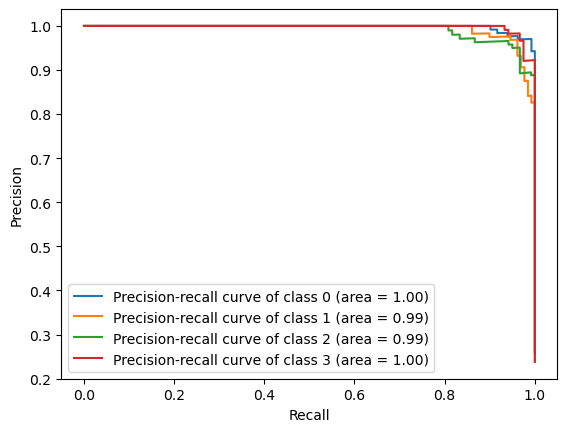

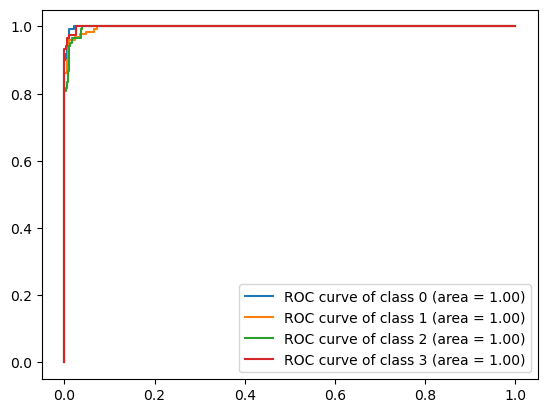

In [175]:
print("======= LOGISTIC REGRESSION ==========")
precisioRecallCurveAndROCCurveforModels(y_pred_proba_lg)


======= SVC Poly ==========


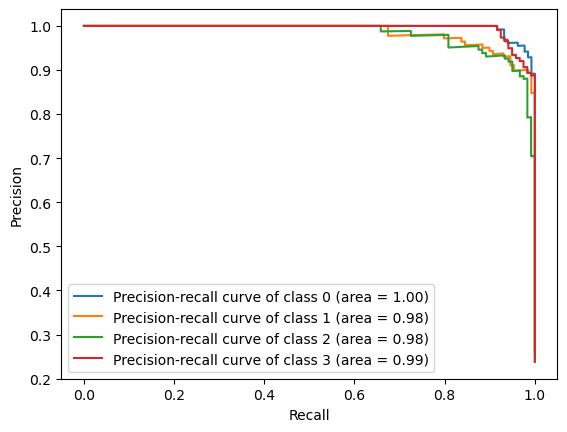

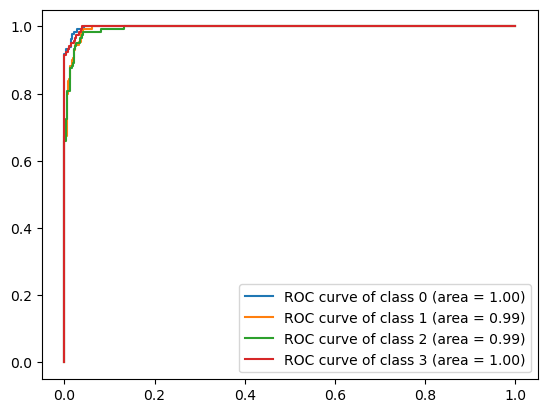

In [176]:
print("\n======= SVC Poly ==========")
precisioRecallCurveAndROCCurveforModels(y_pred_proba_svc_poly)


======= SVC linear ==========


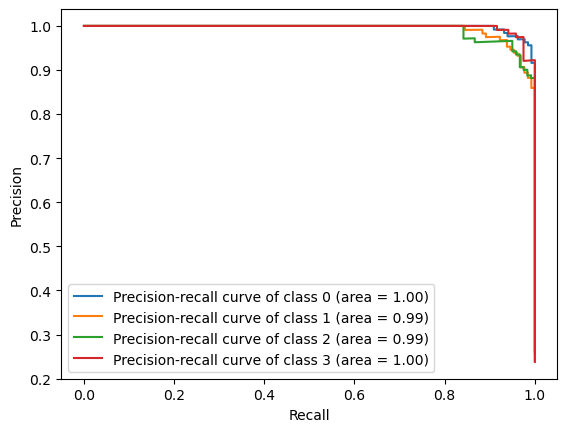

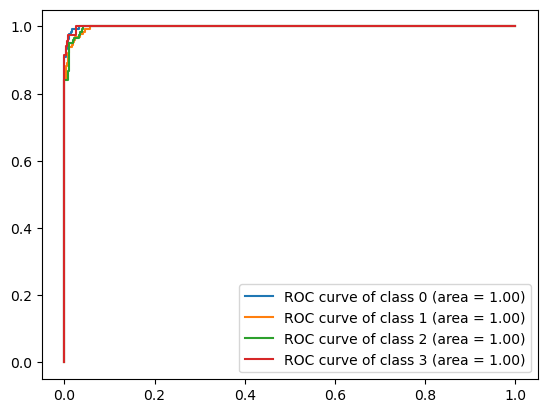

In [177]:
print("\n======= SVC linear ==========")
precisioRecallCurveAndROCCurveforModels(y_pred_proba_svc_linear)

In [178]:
from sklearn.metrics import classification_report
print("======= LOGISTIC REGRESSION ==========")
print(classification_report(y_v, y_pred_lg))

======= LOGISTIC REGRESSION ==========
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       132
         1.0       0.94      0.96      0.95       129
         2.0       0.97      0.93      0.94       120
         3.0       0.95      0.97      0.96       119

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [179]:
print("\n======= SVC Poly ==========")
print(classification_report(y_v, y_pred_svc_poly))


======= SVC Poly ==========
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       132
         1.0       0.93      0.94      0.93       129
         2.0       0.93      0.94      0.93       120
         3.0       0.97      0.95      0.96       119

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



In [168]:
print("\n======= SVC linear ==========")
print(classification_report(y_v, y_pred_svc_linear))


======= SVC linear ==========
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       132
         1.0       0.93      0.97      0.95       129
         2.0       0.97      0.94      0.95       120
         3.0       0.97      0.97      0.97       119

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

